In [80]:
import sys
sys.path.append('../')
from astroquery.simbad import Simbad
from astropy.table import join
import astropy.units as u

from source_names_dict import simbad_ulxs_by_nbib
import ads
from astropy.table.pprint import conf
conf.max_lines = -1
conf.max_width = -1

In [81]:
Simbad.add_votable_fields('bibcodelist(1800-2014)')

In [82]:
d = Simbad.query_objectids(simbad_ulxs_by_nbib)

/home/x1/.pyenv/versions/3.10.4/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 2 raised an error (recorded in the `errors` attribute of the result table): '
  warnings.warn("Warning: The script line number %i raised "


In [83]:
ulxs = Simbad.query_criteria(otype='ULX')
ulxs.sort('BIBLIST_1800_2014', reverse=True)
ulxs

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,BIBLIST_1800_2014,BIBLIST_1800_2014_1,BIBLIST_1800_2014_2,BIBLIST_1800_2014_3,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32,int32,int32,int32,int32
NGC 3310,10 38 45.8570,+53 30 11.894,9,9,--,--,0,C,N,2006AJ....131.1163S,650,650,650,650,0
NAME M82 ULX-1,09 55 50.01,+69 40 46.0,6,6,--,--,0,D,,2004ApJS..154..519S,161,161,161,161,0
2E 756,03 18 22.00,-66 36 04.3,6,6,--,--,0,D,,2005ApJS..157...59L,137,137,137,137,0
RX J0957.9+6903,09 57 53.290,+69 03 48.20,7,7,54.000,49.000,0,C,O,2009ApJS..182..543A,132,132,132,132,0
[FK2005] 25,14 03 19.63,-41 22 58.7,6,6,1200.000,1200.000,0,D,X,2014MNRAS.442.1054H,120,120,120,120,0
RX J031820.3-662911,03 18 20.00,-66 29 10.9,6,6,1000.000,1000.000,0,D,X,2014MNRAS.442.1054H,104,104,104,104,0
[SST2011] J081929.00+704219.3,08 19 28.99,+70 42 19.4,6,6,700.000,700.000,0,C,X,2014MNRAS.442.1054H,97,97,97,97,0
[SST2011] J034555.61+680455.3,03 45 55.612,+68 04 55.29,7,7,210.000,210.000,90,C,O,2008ApJ...675.1067F,94,94,94,94,0


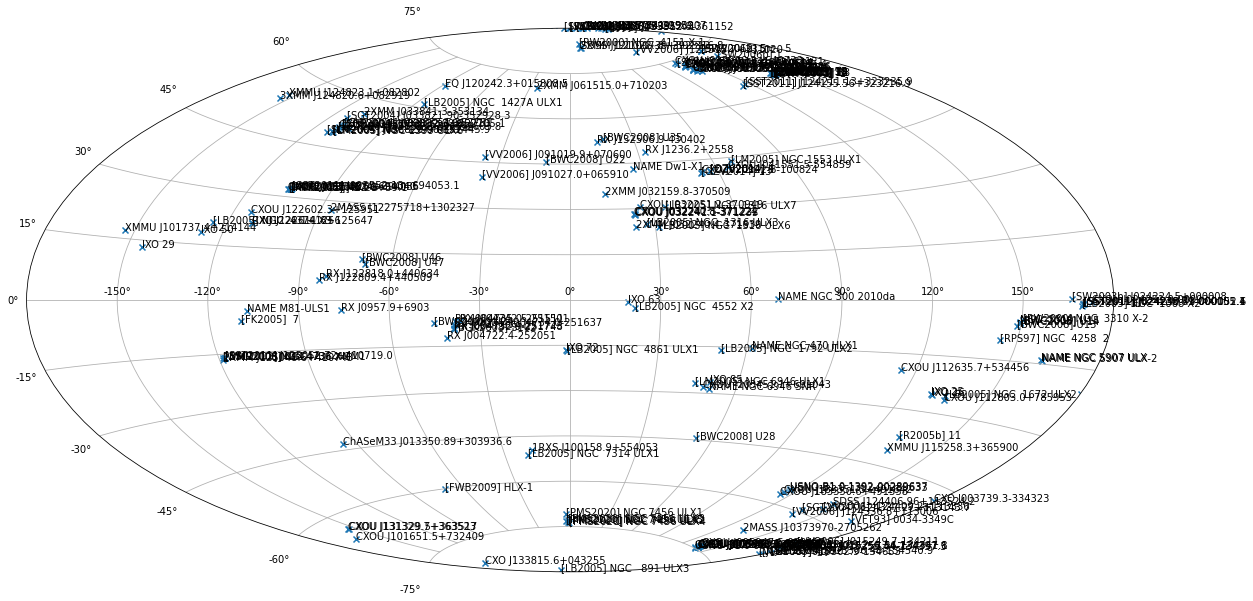

In [131]:
import astropy.coordinates as coord
import matplotlib.pyplot as plt
import astropy.units as u

coordinates = coord.SkyCoord(ra=ulxs['RA'], dec=ulxs['DEC'], unit=(u.hourangle, u.deg))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter(coordinates.ra, coordinates.dec, marker='x')

for i in range(len(ulxs)):
    ra  = coordinates[i].ra 
    dec = coordinates[i].dec
    string = ulxs['MAIN_ID'][i]
    ax.annotate(string, (ra.deg, dec.deg))
    
    
ax.text
ax.grid(True)

229.00458333333333

In [64]:
Simbad.query_object('[VFT93] 0034-3349C')

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,BIBLIST_1800_2014,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32,int32
[VFT93] 0034-3349C,00 36 52.660,-33 33 17.07,7,7,--,--,0,D,O,2013MNRAS.430.2097J,11,1


In [48]:
papers = ads.SearchQuery(bibcode=bibcode)

In [59]:
papers.articles

[]

In [60]:
for r in ulxs:
    main_id = r['MAIN_ID']
    bibcode = r['COO_BIBCODE']
    papers = ads.SearchQuery(bibcode=bibcode)
    for paper in papers:
        print(f'{main_id:<40} {bibcode:<40} {paper.title}')

[VFT93] 0034-3349C                       2013MNRAS.430.2097J                      ['The Lyman break analogue Haro 11: spatially resolved chemodynamics with VLT FLAMES']
[SGT2004] J015259.44-134357.5            2003ApJ...585..756J                      ['X-Ray Source Population in the Elliptical Galaxy NGC 720 with Chandra']
SDSS J092013.63+640605.4                 2018yCat.1345....0G                      ['VizieR Online Data Catalog: Gaia DR2 (Gaia Collaboration, 2018)']
[LB2005] NGC  1672 ULX2                  2005ApJS..157...59L                      ['Ultraluminous X-Ray Sources in Nearby Galaxies from ROSAT High Resolution Imager Observations I. Data Analysis']
2E   756                                 2005ApJS..157...59L                      ['Ultraluminous X-Ray Sources in Nearby Galaxies from ROSAT High Resolution Imager Observations I. Data Analysis']
[SST2011] J124155.56+323216.9            2004ApJS..154..519S                      ['The Ultraluminous X-Ray Source Population from 

APIResponseError: '{\n  "responseHeader":{\n    "status":400,\n    "QTime":2,\n    "params":{\n      "q":" bibcode:\\"\\"",\n      "fl":"id,author,first_author,bibcode,id,year,title",\n      "cursorMark":"*",\n      "start":"0",\n      "internal_logging_params":"X-Amzn-Trace-Id=Root=1-62c499cb-3d5635220172bc2f08cc61ff",\n      "sort":"score desc,id desc",\n      "rows":"50",\n      "wt":"json"}},\n  "error":{\n    "metadata":[\n      "error-class","org.apache.solr.common.SolrException",\n      "root-error-class","java.lang.Exception"],\n    "msg":"org.apache.solr.search.SyntaxError: INVALID_SYNTAX_CANNOT_PARSE: Syntax Error, cannot parse  bibcode:\\"\\": The parser reported a syntax error, antlrqueryparser hates errors! ",\n    "code":400}}\n'

In [57]:
articles = [list(ads.SearchQuery(bibcode=bibcode))[0] for bibcode in ulx_bibcodes]


KeyboardInterrupt



In [ ]:
articles

In [30]:
for bibcode in ulxs['COO_BIBCODE']:
    print(bibcode)

2013MNRAS.430.2097J
2003ApJ...585..756J
2018yCat.1345....0G
2005ApJS..157...59L
2005ApJS..157...59L
2004ApJS..154..519S
2004ApJS..154..519S
2002MNRAS.330..259L
2006ApJ...646..174K
2005ApJS..157...59L
2002ApJS..142..239Z
2003ApJ...586..826K
2014MNRAS.442.1054H
2019ApJ...883...44W
2005ApJS..157...59L
2020yCat.1350....0G
2003ApJ...594L..31Z
2006AJ....131.1163S
2013ApJ...777....7S
2014MNRAS.442.1054H
2008ApJ...687..471B
2001AJ....122..182B
2003AJ....125..984M
2004ApJS..154..519S
2003AJ....125..984M
2020ApJ...890..166P
2000MNRAS.315...98R
2020yCat.1350....0G
2013ApJ...777....7S
2001ApJ...552..106B
2003AJ....125..984M
2004ApJS..154..519S
2008MNRAS.390...59L
2011ApJ...741...49S
2014MNRAS.442.1054H
2010A&A...518A..10V
2014MNRAS.442.1054H
2003ApJ...594L..31Z
2004ApJS..154..519S
2003ApJ...585..756J
2012ApJ...756...27L
2012ApJS..203...21A
2005A&A...435...65B
2005MNRAS.359..455R
2003ApJ...583..145T
2003ApJ...585..756J
2020yCat.1350....0G
2018MNRAS.477L..90P
2014ApJS..212...21L
2020ApJ...893L..28V


In [16]:
for s in simbad_ulxs_by_nbib:
    objids = Simbad.query_objectids(s)
    for r in objids:
        alias = r[0]
        print(f'{s:<40} {alias}')
    print('='*100)

USNO-B1.0 1540-00162426                  CXOU J092019.5+640454
USNO-B1.0 1540-00162426                  USNO-B1.0 1540-00162426
USNO-B1.0 1540-00162426                  [SMM2013] NGC 2805 X-2
CXOU J092006.3+640738                    CXOU J092006.3+640738
CXOU J092006.3+640738                    [SMM2013] NGC 2805 X-4
[PMS2020] NGC 7456 ULX5                  [PMS2020] NGC 7456 ULX5
CXO J121345.2+363754                     [LB2005] NGC  4190 ULX1
CXO J121345.2+363754                     [LB2005] NGC  4190 X1
CXO J121345.2+363754                     CXO J121345.2+363754
3XMM J141711.1+522541                    3XMM J141711.1+522541
CXOU J005953.3-073457                    CXOU J005953.3-073457
CXOU J005953.3-073457                    [SMM2013] NGC  337 X-10
[RPS97] NGC 4258 2                       [RPS97] NGC  4258  2
[RPS97] NGC 4258 2                       [LM2005] NGC 4258 ULX1
RX J133719-29536                         [FK2005] 24
RX J133719-29536                         [LB2005] NGC  5

In [22]:
Simbad.query_objects(simbad_ulxs_by_nbib)

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
USNO-B1.0 1540-00162426,09 20 19.69,+64 04 54.9,6,6,999.000,882.000,0,D,O,2003AJ....125..984M,1
CXOU J092006.3+640738,09 20 06.3,+64 07 38,5,5,--,--,0,D,X,2013ApJ...777....7S,2
[PMS2020] NGC 7456 ULX5,23 02 03.80,-39 33 52.0,6,6,--,--,0,C,X,2020ApJ...890..166P,3
CXO J121345.2+363754,12 13 45.41,+36 37 55.2,6,6,--,--,0,D,,2005ApJS..157...59L,4
3XMM J141711.1+522541,14 17 11.10,+52 25 41.8,6,6,--,--,0,D,,2016yCat.9046....0X,5
CXOU J005953.3-073457,00 59 53.3,-07 34 57,5,5,--,--,0,D,X,2013ApJ...777....7S,6
[RPS97] NGC 4258 2,12 18 55.43,+47 17 59.2,6,6,--,--,0,D,,2005A&A...429.1125L,7
RX J133719-29536,13 37 20.12,-29 53 47.7,6,6,--,--,0,D,,2005ApJS..157...59L,8


In [26]:
ulxs

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
[VFT93] 0034-3349C,00 36 52.660,-33 33 17.07,7,7,--,--,0,D,O,2013MNRAS.430.2097J,0
[SGT2004] J015259.44-134357.5,01 52 59.41,-13 43 56.9,6,6,--,--,0,D,,2003ApJ...585..756J,0
SDSS J092013.63+640605.4,09 20 13.6745,+64 06 05.200,14,14,1.372,2.135,90,A,O,2018yCat.1345....0G,0
[LB2005] NGC 1672 ULX2,04 45 52.87,-59 14 59.1,6,6,--,--,0,D,,2005ApJS..157...59L,0
2E 756,03 18 22.00,-66 36 04.3,6,6,--,--,0,D,,2005ApJS..157...59L,0
[SST2011] J124155.56+323216.9,12 41 55.56,+32 32 16.9,6,6,--,--,0,D,,2004ApJS..154..519S,0
[SST2011] J125052.72+410719.0,12 50 52.72,+41 07 19.0,6,6,--,--,0,D,,2004ApJS..154..519S,0
[LDT2000] R08,10 27 51.64,-43 54 09.7,6,6,--,--,0,D,,2002MNRAS.330..259L,0
